# Decision Tree

The decision tree is a widely used model for classification and regression problems.

In scikit-learn, decision trees are implemented as **DecisionTreeRegressor** and **DecisionTreeClassifier**.  
Scikit-learn supports only **pre-pruning** (also known as early stopping) for decision trees.


In [1]:
### 필요한 패키지를 import

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

### Breast Cancer Dataset

- Load the breast cancer dataset provided by sklearn.
- Split the data into training and testing sets.

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

### Creating the Decision Tree Model

- Create a DecisionTreeClassifier for classification.
- Evaluate the model on both the training and testing datasets.



In [3]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


### Solving Overfitting

- You can prevent overfitting by specifying one of the following hyperparameters: `max_depth`, `max_leaf_nodes`, or `min_samples_leaf`.
- Setting these parameters helps to control the complexity of the decision tree model.


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))


Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


### Decision Tree visualiztion



In [6]:
from sklearn.tree import plot_tree

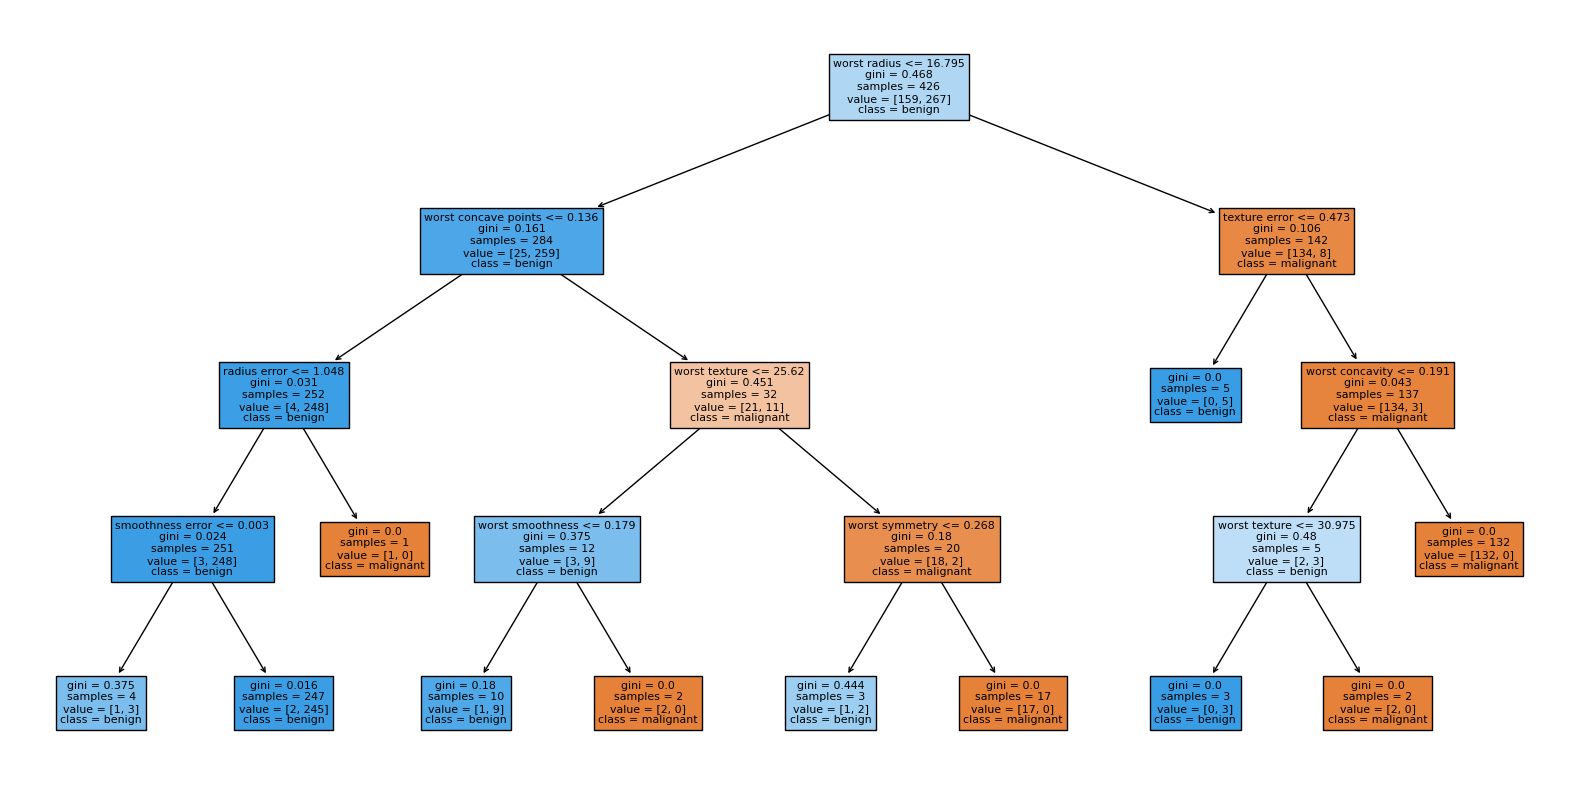

In [7]:
clf = tree.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, class_names=['malignant', 'benign'], feature_names=cancer.feature_names, filled=True)
plt.show()

### feature_importances

In [7]:
print("Feature Importances:\n{}".format(tree.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


### feature_importances visualization

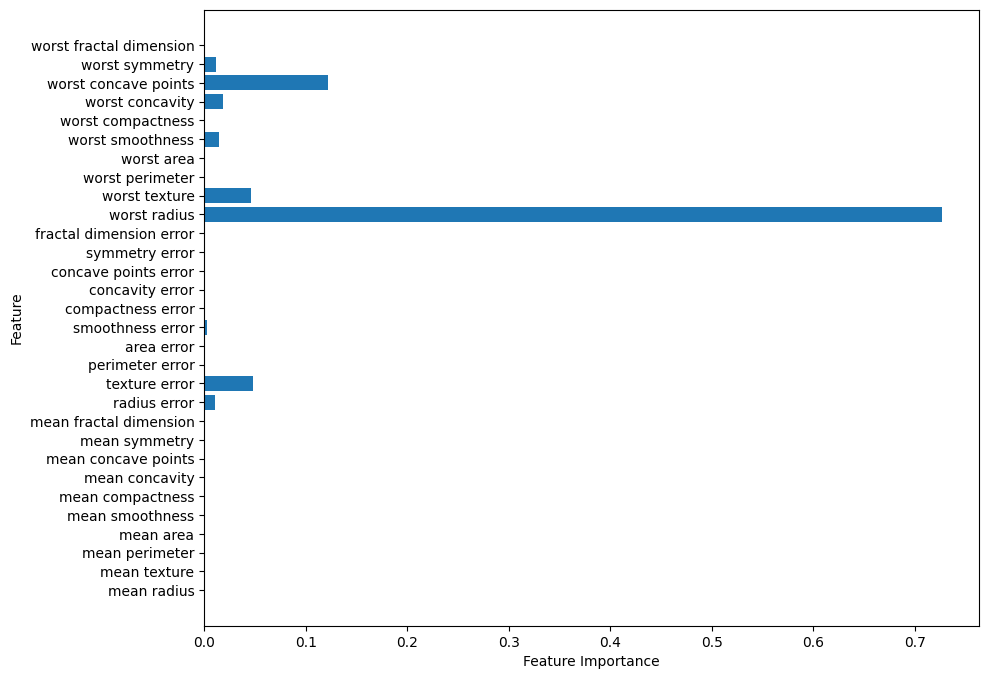

In [8]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()